<a href="https://colab.research.google.com/github/pankajkosarkar11/jai-shree-ram/blob/main/skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] ='pan73000'
os.environ['KAGGLE_KEY'] = '6c8fbfaab2a6a4d95ad6a9bc922c39b3'

In [2]:
!kaggle datasets download jaiahuja/skin-cancer-detection

 99% 779M/786M [00:07<00:00, 128MB/s]
100% 786M/786M [00:07<00:00, 116MB/s]


In [3]:
!unzip skin-cancer-detection.zip

Archive:  skin-cancer-detection.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISI

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
data_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_test="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

In [6]:
image_count_train = len(os.listdir(data_train))
print(image_count_train)
image_count_test = len(os.listdir(data_test))
print(image_count_test)

9
9


In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=(batch_size))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
import tensorflow as tf
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_test,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=(batch_size))

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=(batch_size))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


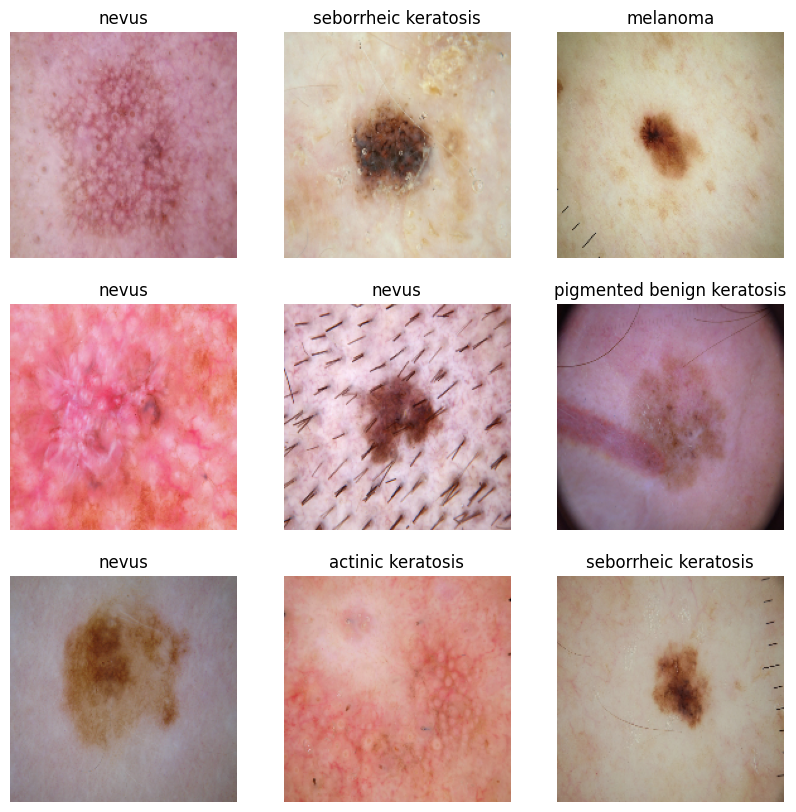

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = 9 # As target class has 9 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 27s 72ms/step - loss: 1.9414 - accuracy: 0.2846 - val_loss: 1.7514 - val_accuracy: 0.3826
Epoch 2/25
56/56 [==============================] - 1s 22ms/step - loss: 1.6426 - accuracy: 0.3862 - val_loss: 1.5955 - val_accuracy: 0.3982
Epoch 3/25
56/56 [==============================] - 1s 21ms/step - loss: 1.4786 - accuracy: 0.4727 - val_loss: 1.5415 - val_accuracy: 0.4855
Epoch 4/25
56/56 [==============================] - 1s 21ms/step - loss: 1.3611 - accuracy: 0.5128 - val_loss: 1.5121 - val_accuracy: 0.4877
Epoch 5/25
56/56 [==============================] - 1s 20ms/step - loss: 1.3389 - accuracy: 0.5195 - val_loss: 1.4887 - val_accuracy: 0.5391
Epoch 6/25
56/56 [==============================] - 1s 20ms/step - loss: 1.2319 - accuracy: 0.5619 - val_loss: 1.4059 - val_accuracy: 0.5526
Epoch 7/25
56/56 [==============================] - 1s 20ms/step - loss: 1.1107 - accuracy: 0.6144 - val_loss: 1.4331 - val_accuracy: 0.5056
Epoch 8/25
5

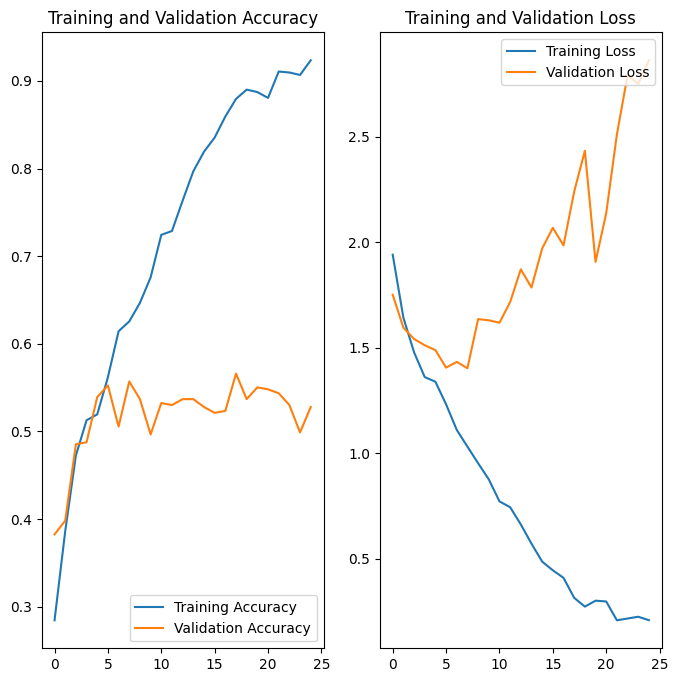

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

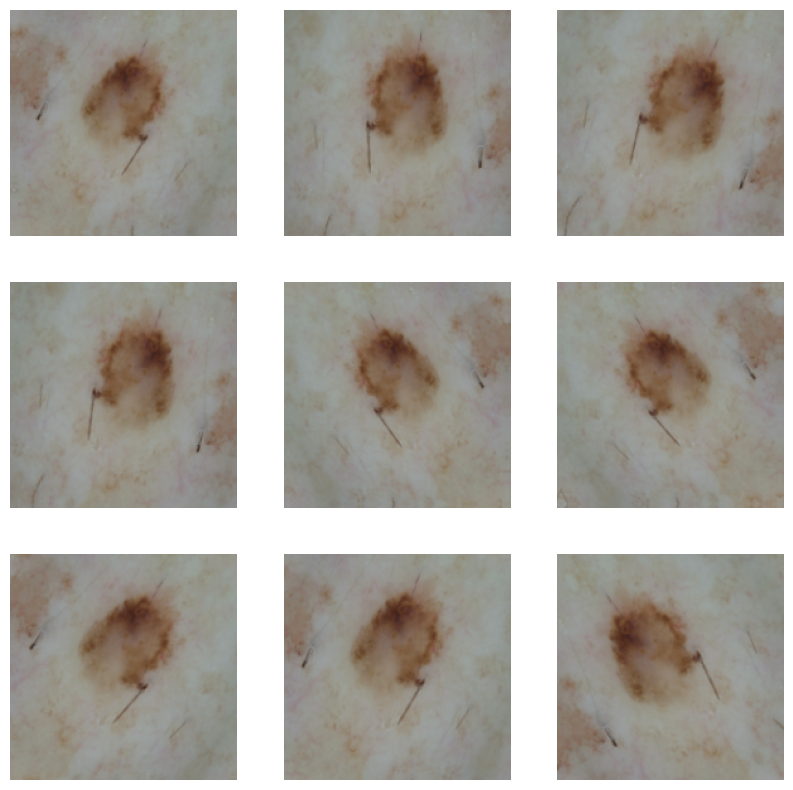

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [23]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
56/56 [==============================] - 93s 2s/step - loss: 2.0168 - accuracy: 0.2578 - val_loss: 1.9358 - val_accuracy: 0.2752
Epoch 2/25
56/56 [==============================] - 79s 1s/step - loss: 1.7452 - accuracy: 0.3650 - val_loss: 1.5713 - val_accuracy: 0.4340
Epoch 3/25
56/56 [==============================] - 78s 1s/step - loss: 1.5951 - accuracy: 0.4431 - val_loss: 1.4635 - val_accuracy: 0.5078
Epoch 4/25
56/56 [==============================] - 78s 1s/step - loss: 1.4887 - accuracy: 0.4771 - val_loss: 1.5333 - val_accuracy: 0.4720
Epoch 5/25
56/56 [==============================] - 78s 1s/step - loss: 1.4186 - accuracy: 0.4961 - val_loss: 1.5216 - val_accuracy: 0.4698
Epoch 6/25
56/56 [==============================] - 83s 1s/step - loss: 1.3930 - accuracy: 0.5145 - val_loss: 1.3906 - val_accuracy: 0.5011
Epoch 7/25
56/56 [==============================] - 77s 1s/step - loss: 1.3519 - accuracy: 0.5273 - val_loss: 1.3620 - val_accuracy: 0.4989
Epoch 8/25
56/56 [==

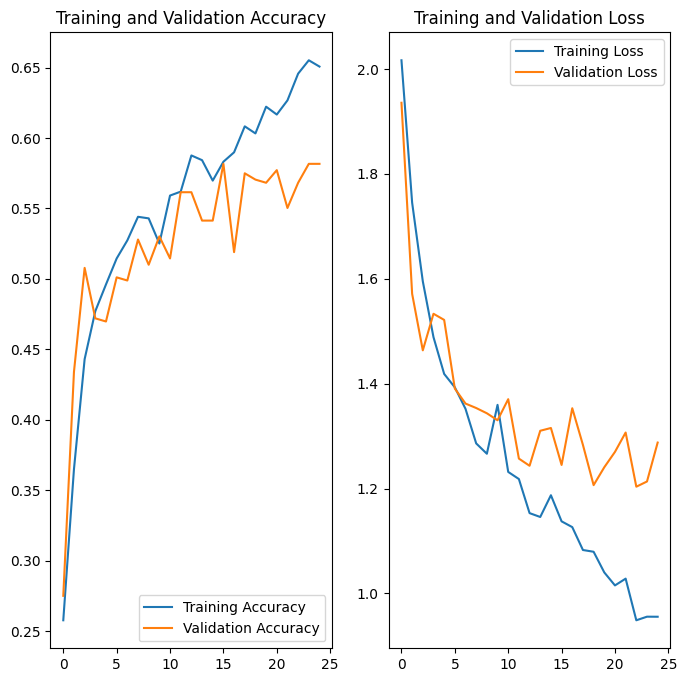

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()